In [1]:
import numpy as np
import seaborn as sns
import statistics
import scipy.stats as stats

48


<AxesSubplot: >

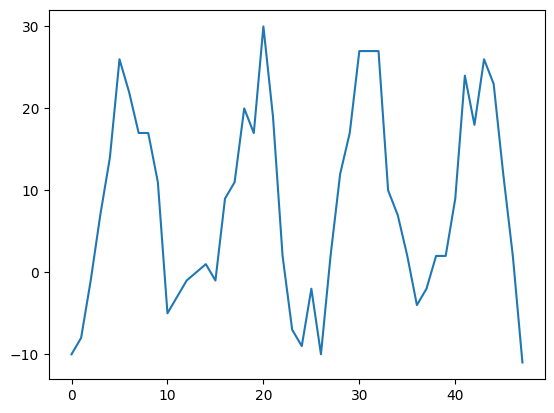

In [2]:
data = np.array([
    -10, -8, -1, 7, 14, 26, 22, 17, 17, 11, -5, -3,
    -1, 0, 1, -1, 9, 11, 20, 17, 30, 19, 2, -7,
    -9, -2, -10, 2, 12, 17, 27, 27, 27, 10, 7, 2,
    -4, -2, 2, 2, 9, 24, 18, 26, 23, 12, 2, -11])
print(data.size)
sns.lineplot(data)

In [3]:
def smooth_sma(series, *, m):
    smoothed_series = series.copy()
    k = m  // 2
    if m % 2 == 1:
        for t in range(k, len(series)-1-k):
            avg = sum(series[t-k : t+k+1]) / m
            smoothed_series[t] = avg
    else:
        for t in range(k, len(series)-1-k):
            avg = (series[t - k] / 2 + sum(series[t-k+1 : t+k]) + series[t + k] / 2) / m
            smoothed_series[t] = avg

    return smoothed_series

<AxesSubplot: >

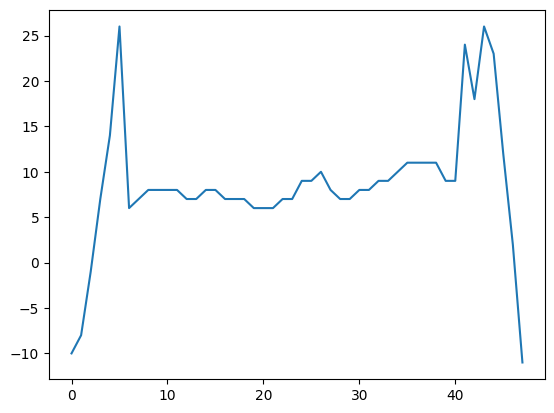

In [4]:
# Сглаживаем
smoothed = smooth_sma(data, m=13)
sns.lineplot(smoothed)

[  0   0   0   0   0   0  16  10   9   3 -13 -11  -8  -7  -7  -9   2   4
  13  11  24  13  -5 -14 -18 -11 -20  -6   5  10  19  19  18   1  -3  -9
 -15 -13  -9  -7   0   0   0   0   0   0   0   0]


<AxesSubplot: >

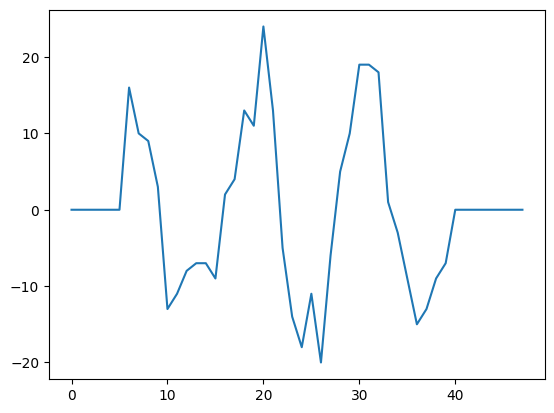

In [5]:
# Удаляем тренд
wo_trend = data - smoothed
print(wo_trend)
sns.lineplot(wo_trend)

24


<AxesSubplot: >

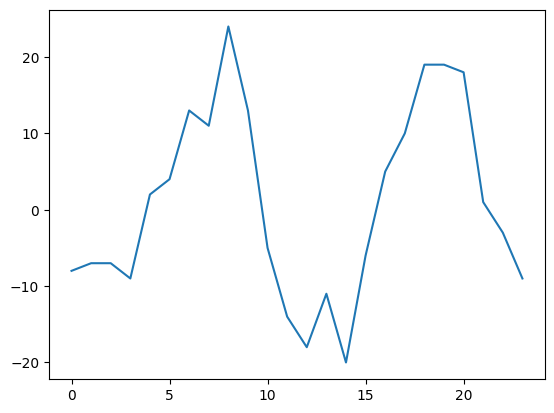

In [6]:
# # Удаляем 2019 и 2022
e = np.array(wo_trend[12:-12])
print(e.size)
sns.lineplot(e)

In [7]:
# рассчитаем средние по месяцам и среднее
n = e.size
t0 = 12
m = n / t0
e_monthavg = np.array([sum(e[j:n:12]) / m for j in range(t0)])
e_avg = sum(e) / e.size
print(e_monthavg)
print(e_avg)

[-13.   -9.  -13.5  -7.5   3.5   7.   16.   15.   21.    7.   -4.  -11.5]
0.9166666666666666


In [8]:
# вычислим F критерий для проверки наличия сезонности
f_stat = m * (n - t0) / t0 * sum((e_monthavg[j] - e_avg)**2 for j in range(t0)) / sum((e[j] - e_monthavg[j % t0])**2 for j in range(n))
f_stat_table = stats.f.ppf(0.99, t0-1, n-t0)
print('Условие:', f_stat, '>', f_stat_table)
if f_stat > f_stat_table:
    print('Сезнонные колебания присутствуют с уровнем значимости 0.01')

Условие: 10.24022633744856 > 4.219819998398951
Сезнонные колебания присутствуют с уровнем значимости 0.99


[-13.91666667  -9.91666667 -14.41666667  -8.41666667   2.58333333
   6.08333333  15.08333333  14.08333333  20.08333333   6.08333333
  -4.91666667 -12.41666667]


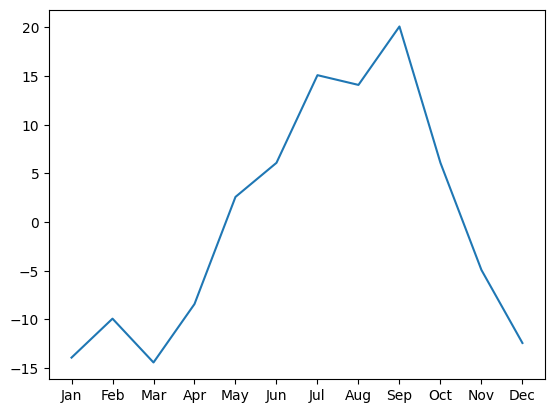

In [9]:
# Найдем сезоннную волну
e_monthavg -= e_avg
sns.lineplot(y=e_monthavg, x=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
print(e_monthavg)